In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import seaborn as sns 
import numpy as np 

Load Dataset

In [2]:
data = pd.read_csv('Advertising_Data.csv')

Data Overview

In [3]:
data.head()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
0,281.42,538.80,123.94,349.30,242.77,910.10,7164.0
1,702.97,296.53,558.13,180.55,781.06,132.43,5055.0
2,313.14,295.94,642.96,505.71,438.91,464.23,6154.0
3,898.52,61.27,548.73,240.93,278.96,432.27,5480.0
4,766.52,550.72,651.91,666.33,396.33,841.93,9669.0


In [4]:
data.describe()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,517.431000,502.644933,512.444133,489.800100,465.732567,484.430633,7031.523333
std,288.114792,275.842369,285.422376,273.883915,288.314080,277.955458,1703.614951
min,1.040000,3.630000,14.860000,11.690000,0.770000,6.740000,2259.000000
25%,273.090000,277.912500,250.530000,265.612500,214.480000,267.677500,5922.500000
50%,513.970000,533.020000,528.965000,486.385000,480.355000,451.315000,7051.000000
75%,774.275000,745.005000,763.345000,695.117500,703.092500,721.065000,8278.000000
max,998.100000,995.320000,999.230000,996.160000,999.830000,987.580000,12227.000000


In [5]:
data.isnull().sum()

TV                      0
Billboards              0
Google_Ads              0
Social_Media            0
Influencer_Marketing    0
Affiliate_Marketing     0
Product_Sold            0
dtype: int64

Data Correlation

In [6]:
corr = data.corr()
corr

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
TV,1.000000,-0.028851,0.025265,-0.038993,0.009970,0.087524,0.374228
Billboards,-0.028851,1.000000,0.052991,0.048722,-0.005815,-0.041060,0.480593
Google_Ads,0.025265,0.052991,1.000000,0.040265,-0.059243,-0.131834,0.203678
Social_Media,-0.038993,0.048722,0.040265,1.000000,-0.042679,-0.019522,0.401088
Influencer_Marketing,0.009970,-0.005815,-0.059243,-0.042679,1.000000,-0.047093,0.140844
Affiliate_Marketing,0.087524,-0.041060,-0.131834,-0.019522,-0.047093,1.000000,0.611603
Product_Sold,0.374228,0.480593,0.203678,0.401088,0.140844,0.611603,1.000000


<Axes: >

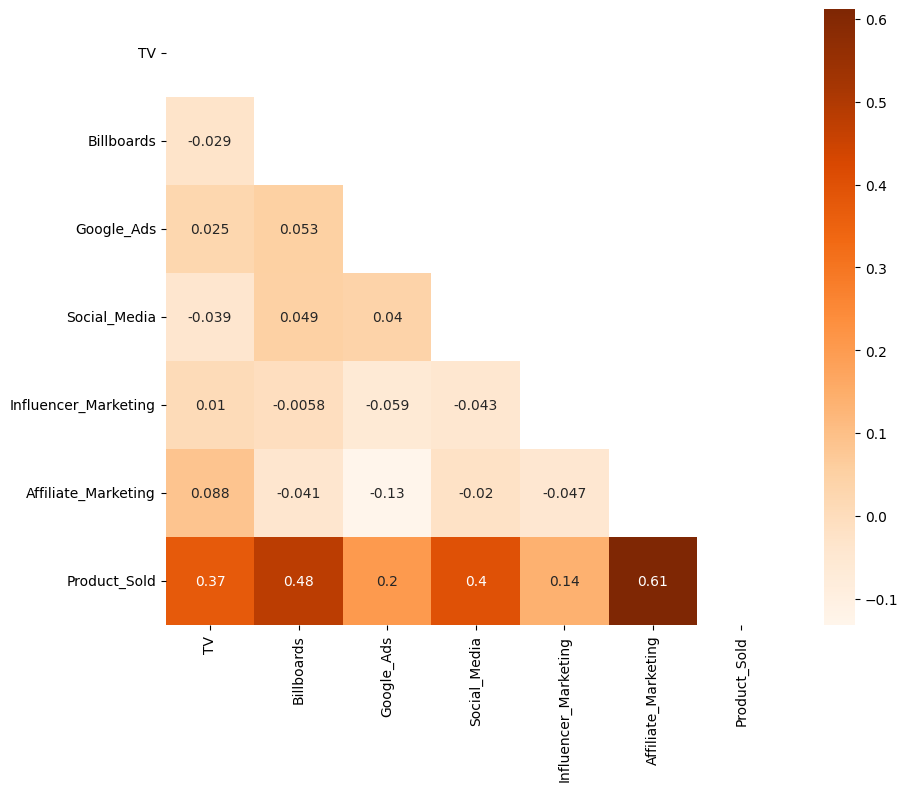

In [7]:
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='Oranges', annot=True, mask=mask)

Scatter plot

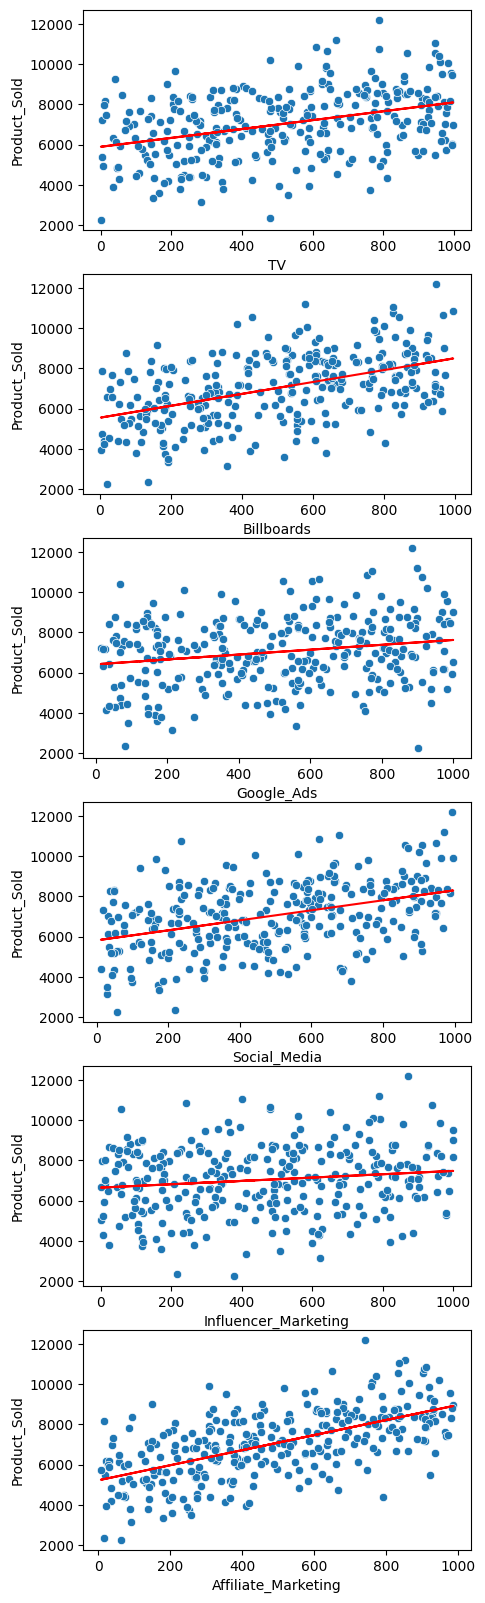

In [8]:
sub = 611
plt.figure(figsize=(5, 20))
for column in data.columns[:-1]:
    x_data = data[column]
    y_data = data['Product_Sold']
    
    regression_line = np.polyfit(x_data, y_data, 1)
    line_function = np.poly1d(regression_line)
    
    plt.subplot(sub)
    sns.scatterplot(x=x_data, y=y_data)
    plt.plot(x_data, line_function(x_data), color='red')
    
    plt.xlabel(column)
    
    sub += 1


OLS estimation

In [9]:
X = data[['TV', 'Billboards', 'Google_Ads', 'Social_Media', 'Influencer_Marketing', 'Affiliate_Marketing']]
X = sm.add_constant(X)
y = data['Product_Sold']
ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:           Product_Sold   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.347e+06
Date:                Thu, 21 Dec 2023   Prob (F-statistic):               0.00
Time:                        10:45:59   Log-Likelihood:                -1123.6
No. Observations:                 300   AIC:                             2261.
Df Residuals:                     293   BIC:                             2287.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0887 

Berdasarkan hasil estimasi ols diatas, nilai probabilitas t-statistik dati TV, Billboard, Google ads, Media sosial, Influencer Marketing, dan Affiliate Marketing memilik nilai 0.000 yang menunjukan bahwa variabel diatas berpengaruh secara signifikan terhadap penjualan. Affliate marketing memiliki nilai coefisien tertinggi dengan nilai 3.9989 dan influencer marketing memiliki koefisien terendah sebesar 1.1998. Nilai koefisien dari affiliate marketing sebesar 3.9989 menunjukan disetiap kenikan biaya affiliate marketing sebesar 1 akan memberikan dampak kenaikan terhadap penjualan sebesar 3.9989. kenaikan yang lebih tinggi dibandingkan dengan teknik pemasaran lain membuat perusahaan dapat memfokuskan alokasi dana pada affiliate marketing dan mengurangi alokasi dana pada influencer.

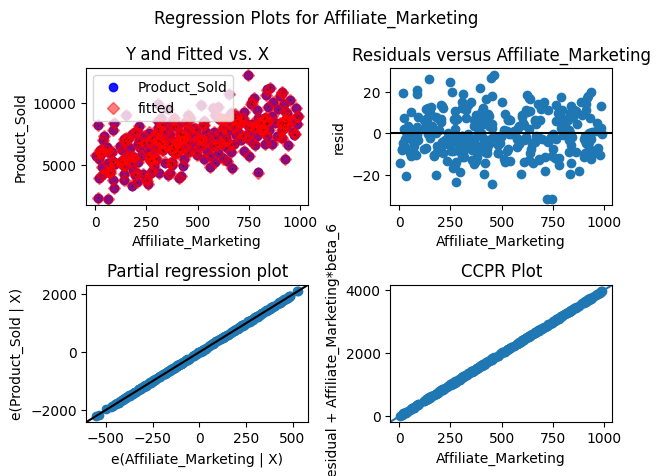

In [12]:
fig = sm.graphics.plot_regress_exog(ols_model, "Affiliate_Marketing")
fig.tight_layout(pad=1.0)

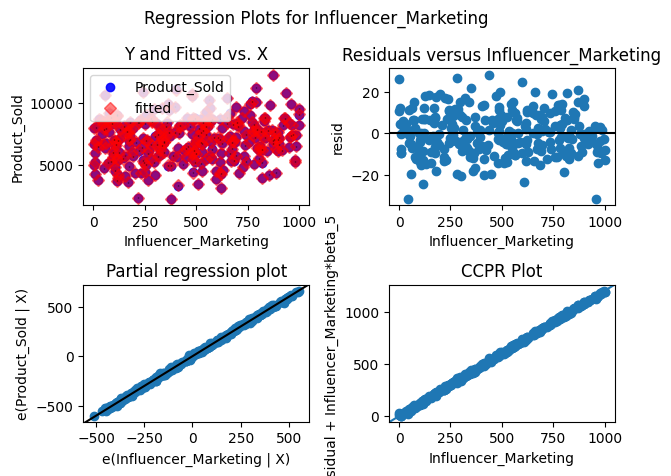

In [13]:
fig = sm.graphics.plot_regress_exog(ols_model, "Influencer_Marketing")
fig.tight_layout(pad=1.0)